<a href="https://colab.research.google.com/github/Noman-Sajal/Employment-Rate-Prediction-by-Neural-Network/blob/main/Employment_Rate__Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import requests

# Step 1: Fetch data from the REST Countries API
response = requests.get('https://restcountries.com/v3.1/all')
countries_data = response.json()

# Step 2: Extract country, continent, area, latitude, and longitude information
country_info_list = []
for country in countries_data:
    country_name = country.get('name', {}).get('common')
    continent = country.get('region')
    area = country.get('area')  # Get the area
    latlng = country.get('latlng', [])  # Get latitude and longitude
    latitude = latlng[0] if len(latlng) > 0 else None  # First element is latitude
    longitude = latlng[1] if len(latlng) > 1 else None  # Second element is longitude

    country_info_list.append({
        'Country Name': country_name,
        'Continent': continent,
        'Area': area,
        'Latitude': latitude,
        'Longitude': longitude
    })
# Step 3: Convert the country information into a DataFrame
country_info_df = pd.DataFrame(country_info_list)

# Display the first few rows to verify the changes
country_info_df.head()


ChunkedEncodingError: ('Connection broken: IncompleteRead(81686 bytes read, 89492 more expected)', IncompleteRead(81686 bytes read, 89492 more expected))

In [25]:
import json
import pandas as pd

# Load the downloaded JSON file
with open('countries_data.json', 'r') as file:
    countries_data = json.load(file)

# Extract country, continent, area, latitude, and longitude information
country_info_list = []
for country in countries_data:
    country_name = country.get('name', {}).get('common')
    continent = country.get('region')
    area = country.get('area')  # Get the area
    latlng = country.get('latlng', [])  # Get latitude and longitude
    latitude = latlng[0] if len(latlng) > 0 else None  # First element is latitude
    longitude = latlng[1] if len(latlng) > 1 else None  # Second element is longitude

    country_info_list.append({
        'Country Name': country_name,
        'Continent': continent,
        'Area': area,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Convert the country information into a DataFrame
country_info_df = pd.DataFrame(country_info_list)

# Display the first few rows to verify the changes
print(country_info_df.head())


    Country Name  Continent     Area   Latitude  Longitude
0  South Georgia  Antarctic   3903.0 -54.500000 -37.000000
1        Grenada   Americas    344.0  12.116667 -61.666667
2    Switzerland     Europe  41284.0  47.000000   8.000000
3   Sierra Leone     Africa  71740.0   8.500000 -11.500000
4        Hungary     Europe  93028.0  47.000000  20.000000


In [26]:
# Step 4: Load the World Bank datasets
gdp_df = pd.read_csv('gdp_data.csv')
labor_force_df = pd.read_csv('labor_force_data.csv')
inflation_df = pd.read_csv('inflation_data.csv')
population_growth_df = pd.read_csv('population_growth_data.csv')
gdp_growth_df = pd.read_csv('gdp_growth_data.csv')
trade_df = pd.read_csv('trade_data.csv')
employment_df = pd.read_csv('employment_data.csv')


In [27]:
# Step 5: Create a set of unique country names from both datasets to check mismatches
world_bank_countries = set(gdp_df['Country Name'].unique())
api_countries = set(country_info_df['Country Name'].unique())

# Find mismatches: Countries in the World Bank dataset not in the API dataset
mismatched_countries = world_bank_countries - api_countries

# Display mismatched countries
print(f"Number of mismatched countries: {len(mismatched_countries)}")
print("Mismatched countries:", mismatched_countries)


Number of mismatched countries: 34
Mismatched countries: {"Cote d'Ivoire", "Korea, Dem. People's Rep.", nan, 'Iran, Islamic Rep.', 'Virgin Islands (U.S.)', 'Syrian Arab Republic', 'Cabo Verde', 'Yemen, Rep.', 'Sint Maarten (Dutch part)', 'Sao Tome and Principe', 'Congo, Rep.', 'Russian Federation', 'West Bank and Gaza', 'St. Kitts and Nevis', 'Congo, Dem. Rep.', 'St. Vincent and the Grenadines', 'St. Lucia', 'Channel Islands', 'Venezuela, RB', 'St. Martin (French part)', 'Micronesia, Fed. Sts.', 'Macao SAR, China', 'Hong Kong SAR, China', 'Korea, Rep.', 'Slovak Republic', 'Gambia, The', 'Kyrgyz Republic', 'Turkiye', 'Viet Nam', 'Curacao', 'Lao PDR', 'Egypt, Arab Rep.', 'Bahamas, The', 'Brunei Darussalam'}


In [28]:
# Dictionary to map country names from API to World Bank dataset format
country_name_mapping = {
    'Bahamas': 'Bahamas, The',
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'Republic of the Congo': 'Congo, Rep.',
    'DR Congo':'Congo, Dem. Rep.',
    'Ivory Coast':"Cote d'Ivoire",
    'Curaçao': 'Curacao',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Hong Kong': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'North Korea': 'Korea, Dem. People’s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Yemen': 'Yemen, Rep.',
    'Laos': 'Lao PDR',
    'Macau': 'Macao SAR, China',
    'Micronesia': 'Micronesia, Fed. Sts.',
    'Russia': 'Russian Federation',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Sint Maarten': 'Sint Maarten (Dutch part)',
    'Slovakia': 'Slovak Republic',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Martin': 'St. Martin (French part)',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'British Virgin Islands': 'Virgin Islands (U.S.)',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam'
}


In [29]:
# Step 8: Define a function to merge datasets and reorder columns
def merge_and_reorder(df, country_info_df):
    merged_df = pd.merge(df, country_info_df, on='Country Name', how='left')

    # Reorder columns to place 'Continent', 'Area', 'Latitude', and 'Longitude' in the desired positions
    columns = merged_df.columns.tolist()
    columns_to_move = ['Continent', 'Area', 'Latitude', 'Longitude']

    # Remove the columns from their current positions
    for col in columns_to_move:
        columns.remove(col)

    # Insert the columns in the desired positions (after 'Country Name' and 'Country Code')
    for i, col in enumerate(columns_to_move):
        columns.insert(3 + i, col)  # Insert starting at index 3 for 4th position

    # Reorder the DataFrame using the new column order
    return merged_df[columns]


In [30]:
# Step 9: Function to clean unwanted footer text (Meta Data) from DataFrames
def clean_footer(df):
    # Replace footer text with NaN
    footer_texts = ["Data from database: World Development Indicators", "Last Updated: 09/19/2024"]
    for footer in footer_texts:
        df.replace(footer, pd.NA, inplace=True)
    return df.dropna(how='all')


In [31]:
# Step 10: Merge each dataset with country_info_df and clean footer texts
gdp_merged = clean_footer(merge_and_reorder(gdp_df, country_info_df))
labor_force_merged = clean_footer(merge_and_reorder(labor_force_df, country_info_df))
inflation_merged = clean_footer(merge_and_reorder(inflation_df, country_info_df))
population_growth_merged = clean_footer(merge_and_reorder(population_growth_df, country_info_df))
gdp_growth_merged = clean_footer(merge_and_reorder(gdp_growth_df, country_info_df))
trade_merged = clean_footer(merge_and_reorder(trade_df, country_info_df))
employment_merged = clean_footer(merge_and_reorder(employment_df, country_info_df))


In [32]:
# Step 11: Concatenate all merged datasets into a single DataFrame
combined_df = pd.concat([
    gdp_merged,
    labor_force_merged,
    inflation_merged,
    population_growth_merged,
    gdp_growth_merged,
    trade_merged,
    employment_merged
], ignore_index=True)


In [33]:
# Step 12: Display the first few rows and check the shape of the combined dataset
print("Shape of the combined DataFrame:", combined_df.shape)
combined_df.head()


Shape of the combined DataFrame: (1519, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,..,..,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [34]:
# Step 13: Handle missing values by counting NaNs, zeros, and placeholder values
nan_count = combined_df.isna().sum().sum()
zero_count = (combined_df == 0).sum().sum()
placeholder_count = (combined_df == '..').sum().sum()

# Step 14: Display the counts of missing values
print(f"Total NaN values: {nan_count}")
print(f"Total 0 values: {zero_count}")
print(f"Total placeholder values ('..'): {placeholder_count}")
# Check the shape
print("Shape of the DataFrame:", combined_df.shape)


Total NaN values: 924
Total 0 values: 0
Total placeholder values ('..'): 3806
Shape of the DataFrame: (1519, 32)


In [35]:
# Replace '..' with NaN
combined_df.replace('..', pd.NA, inplace=True)

# Drop rows where 'Continent' is NaN or empty or 0
combined_df = combined_df.dropna(subset=['Continent'])
# combined_df = combined_df[combined_df['Continent'] != 0]

# Display the shape of the DataFrame after dropping rows
print("Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent':", combined_df.shape)

# Display the first few rows to verify the changes
combined_df.head()



Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent': (1288, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,<NA>
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,<NA>,<NA>,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,<NA>
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [36]:
import pandas as pd
import numpy as np

# Step 1: Melt the dataframe, including additional columns for 'Longitude', 'Latitude', and 'Area'
melted_df = combined_df.melt(
    id_vars=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Series Name'],
    value_vars=[col for col in combined_df.columns if '[YR' in col],
    var_name='Year',
    value_name='Value'
)

# Clean 'Year' to extract only the year number and ensure it's an integer
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})').astype(int)

# Ensure 'Value' is numeric, converting any non-numeric entries to NaN
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Step 2: Pivot on 'Country Name' and 'Year' to get year-wise data per country and indicator
pivoted_df = melted_df.pivot_table(
    index=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Flatten the columns after pivoting
pivoted_df.columns.name = None

# Convert 'Year' column to integer (if it somehow turns into a float during processing)
pivoted_df['Year'] = pivoted_df['Year'].astype(int)

# Step 3: Define the threshold for missing values (10%)
threshold = 0.1  # 10%
threshold_num = int(pivoted_df.shape[1] * threshold)

# Step 4: Drop rows where NaN, empty, '0', or placeholder values exceed the threshold
rows_to_drop = pivoted_df[
    (pivoted_df.isna().sum(axis=1) > threshold_num) |
    ((pivoted_df == '').sum(axis=1) > threshold_num) |
    ((pivoted_df == '..').sum(axis=1) > threshold_num) |
    ((pivoted_df == 0).sum(axis=1) > threshold_num)
]

pivoted_df.drop(rows_to_drop.index, inplace=True)

# Step 5: Convert all columns to numeric where applicable, handling non-numerical values as NaN
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')  # Start from the 7th column onward for data

# Step 6: Fill remaining missing values in the data columns (assuming columns after 'Year' are indicators)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].bfill(axis=1)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].ffill(axis=1)

# Final check
print("Shape of the DataFrame after handling missing values:", pivoted_df.shape)
pivoted_df.head()


Shape of the DataFrame after handling missing values: (3698, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [37]:
import pandas as pd
import numpy as np

# Step 1: Melt the dataframe, including additional columns for 'Longitude', 'Latitude', and 'Area'
melted_df = combined_df.melt(
    id_vars=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Series Name'],
    value_vars=[col for col in combined_df.columns if '[YR' in col],
    var_name='Year',
    value_name='Value'
)

# Clean 'Year' to extract only the year number and ensure it's an integer
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})').astype(int)

# Ensure 'Value' is numeric, converting any non-numeric entries to NaN
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Step 2: Pivot on 'Country Name' and 'Year' to get year-wise data per country and indicator
pivoted_df = melted_df.pivot_table(
    index=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Flatten the columns after pivoting
pivoted_df.columns.name = None

# Convert 'Year' column to integer (if it somehow turns into a float during processing)
pivoted_df['Year'] = pivoted_df['Year'].astype(int)

# Step 3: Define the threshold for missing values (10%)
threshold = 0.1  # 10%
threshold_num = int(pivoted_df.shape[1] * threshold)

# Step 4: Drop rows where NaN, empty, '0', or placeholder values exceed the threshold
rows_to_drop = pivoted_df[
    (pivoted_df.isna().sum(axis=1) > threshold_num) |
    ((pivoted_df == '').sum(axis=1) > threshold_num) |
    ((pivoted_df == '..').sum(axis=1) > threshold_num) |
    ((pivoted_df == 0).sum(axis=1) > threshold_num)
]

pivoted_df.drop(rows_to_drop.index, inplace=True)

# Step 5: Convert all columns to numeric where applicable, handling non-numerical values as NaN
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')  # Start from the 7th column onward for data

# Step 6: Fill remaining missing values in the data columns (assuming columns after 'Year' are indicators)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].bfill(axis=1)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].ffill(axis=1)

# Final check
print("Shape of the DataFrame after handling missing values:", pivoted_df.shape)

pivoted_df.head()


Shape of the DataFrame after handling missing values: (3698, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [38]:
import pandas as pd

# Count the number of rows for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()

# Rename columns for clarity
country_row_counts.columns = ['Country Name', 'Row Count']

# Display the entire DataFrame without truncation
pd.set_option('display.max_rows', None)  # Show all rows
print("Full list of row counts for each country:")
print(country_row_counts)



Full list of row counts for each country:
                 Country Name  Row Count
0                      Israel         24
1                    Mongolia         24
2                        Mali         24
3                       Malta         24
4                  Mauritania         24
5                   Mauritius         24
6                      Mexico         24
7                     Moldova         24
8                  Montenegro         24
9                     Ireland         24
10                    Morocco         24
11                 Mozambique         24
12        Trinidad and Tobago         24
13                    Namibia         24
14                      Nepal         24
15                Netherlands         24
16                   Maldives         24
17                   Malaysia         24
18                     Malawi         24
19                 Madagascar         24
20                 Luxembourg         24
21                  Lithuania         24
22             

In [39]:
# Step 7: Count the number of years of data for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()
country_row_counts.columns = ['Country Name', 'Row Count']

# Step 8: Filter out countries with less than 17 years of data
filtered_country_row_counts_df = country_row_counts[country_row_counts['Row Count'] >= 17]

# Step 9: Get the list of valid countries
valid_countries = filtered_country_row_counts_df['Country Name'].tolist()

# Step 10: Filter the main pivoted_df to only include rows from valid countries
filtered_main_df = pivoted_df[pivoted_df['Country Name'].isin(valid_countries)]


# Drop the year 2023 from the filtered DataFrame
filtered_main_df = filtered_main_df[filtered_main_df['Year'] != 2023]

# Display the shape of the DataFrame after dropping 2023
print("Shape of the DataFrame after dropping the year 2023:", filtered_main_df.shape)
filtered_main_df.head()  # Display the first few rows of the updated DataFrame



Shape of the DataFrame after dropping the year 2023: (3515, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [40]:
import pandas as pd

# Count the number of rows for each country
country_row_counts = filtered_main_df['Country Name'].value_counts().reset_index()

# Rename columns for clarity
country_row_counts.columns = ['Country Name', 'Row Count']

# Display the entire DataFrame without truncation
pd.set_option('display.max_rows', None)  # Show all rows
print("Full list of row counts for each country:")
print(country_row_counts)



Full list of row counts for each country:
                 Country Name  Row Count
0                     Lebanon         23
1                     Morocco         23
2                     Namibia         23
3                       Nepal         23
4                 Netherlands         23
5                 New Zealand         23
6                   Nicaragua         23
7                       Niger         23
8                     Nigeria         23
9             North Macedonia         23
10                     Norway         23
11                       Oman         23
12                   Pakistan         23
13                     Panama         23
14           Papua New Guinea         23
15                   Paraguay         23
16                       Peru         23
17                 Mozambique         23
18                 Montenegro         23
19                     Kuwait         23
20                   Mongolia         23
21                    Albania         23
22             

In [41]:
# Select only the required columns for prediction and analysis
df = filtered_main_df[['Country Name', 'Continent', 'Year',
         'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
         'GDP (current US$)', 'GDP growth (annual %)',
         'Inflation, consumer prices (annual %)',
         'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
         'Population growth (annual %)', 'Trade (% of GDP)']]


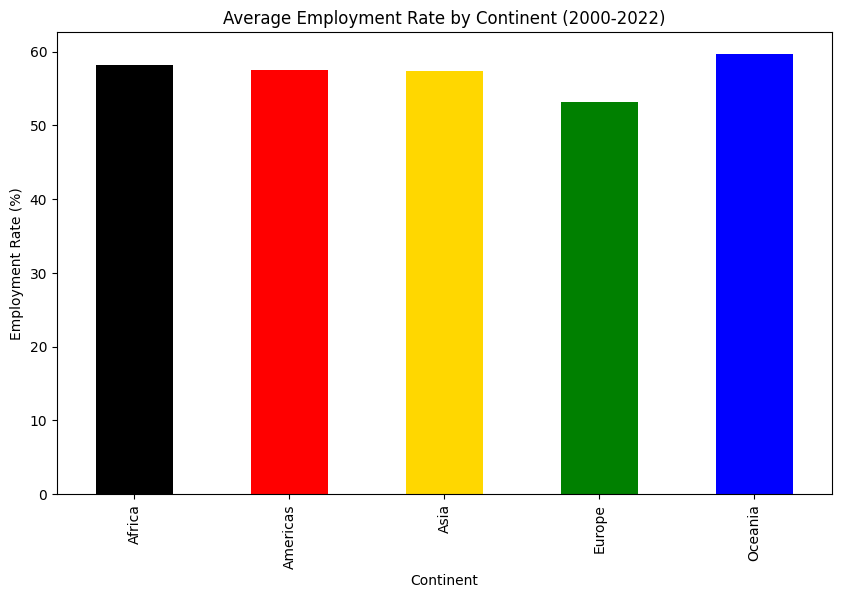

In [42]:
import matplotlib.pyplot as plt

# Calculate the overall average employment rate per continent (across all years)
continent_employment_rate = df.groupby('Continent')['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].mean()

# Define the Olympic ring colors
olympic_colors = ['black', 'red', 'gold', 'green', 'blue']

# Plot overall average employment rate per continent with Olympic colors
plt.figure(figsize=(10, 6))
continent_employment_rate.plot(kind='bar', color=olympic_colors[:len(continent_employment_rate)])
plt.title('Average Employment Rate by Continent (2000-2022)')
plt.xlabel('Continent')
plt.ylabel('Employment Rate (%)')
plt.show()


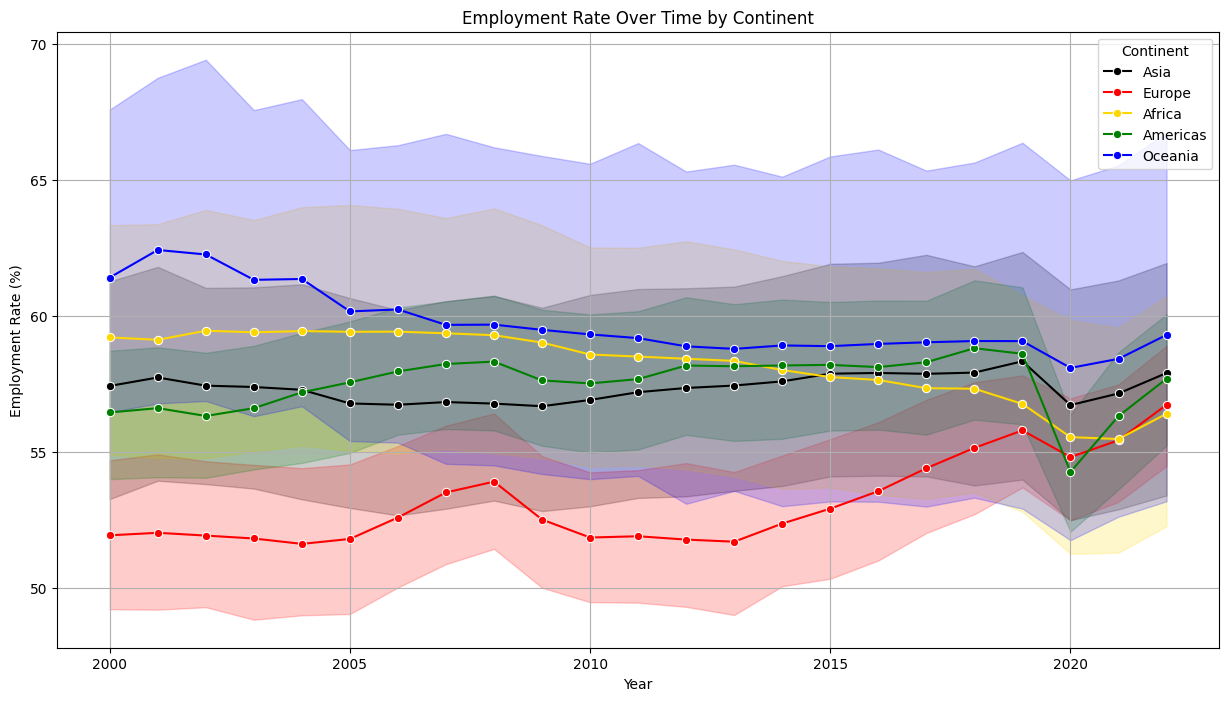

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already structured with columns 'Year', 'Continent', and 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'
# Rename the employment rate column for simplicity
df_renamed = df.rename(columns={'Employment to population ratio, 15+, total (%) (modeled ILO estimate)': 'Employment Rate'})

# Plot using seaborn's lineplot with hue to distinguish continents
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_renamed, x='Year', y='Employment Rate', hue='Continent', marker='o', palette=['black', 'red', 'gold', 'green', 'blue'])
plt.title('Employment Rate Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()


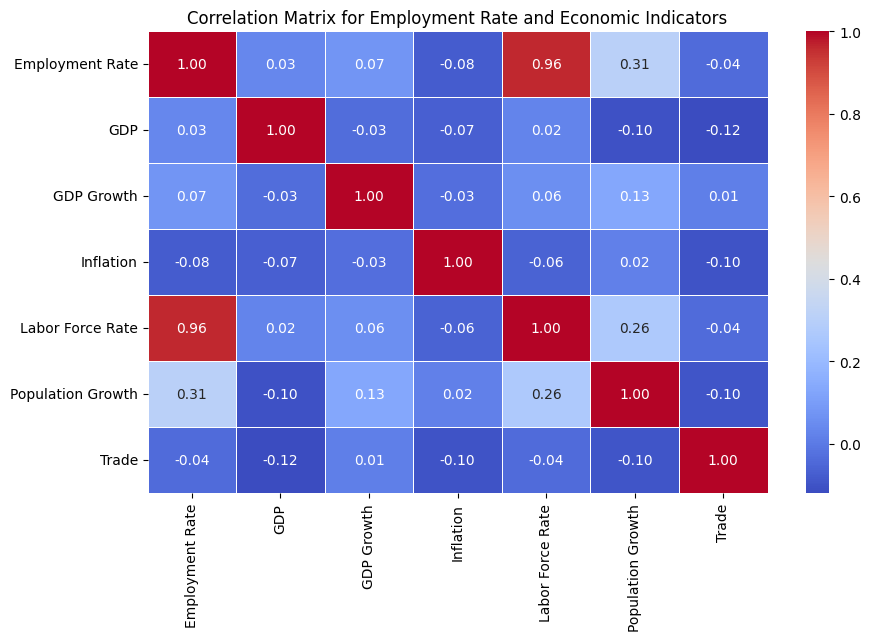

In [44]:
import seaborn as sns
# Rename columns for better readability
df_renamed = df.rename(columns={
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': 'Labor Force Rate',
    'Population growth (annual %)': 'Population Growth',
    'Trade (% of GDP)': 'Trade',
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)': 'Employment Rate'
})

# **Correlation Heatmap for Entire Dataset**
# Create a correlation matrix
corr = df_renamed[['Employment Rate', 'GDP', 'GDP Growth', 'Inflation',
                   'Labor Force Rate', 'Population Growth', 'Trade']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Employment Rate and Economic Indicators')
plt.show()


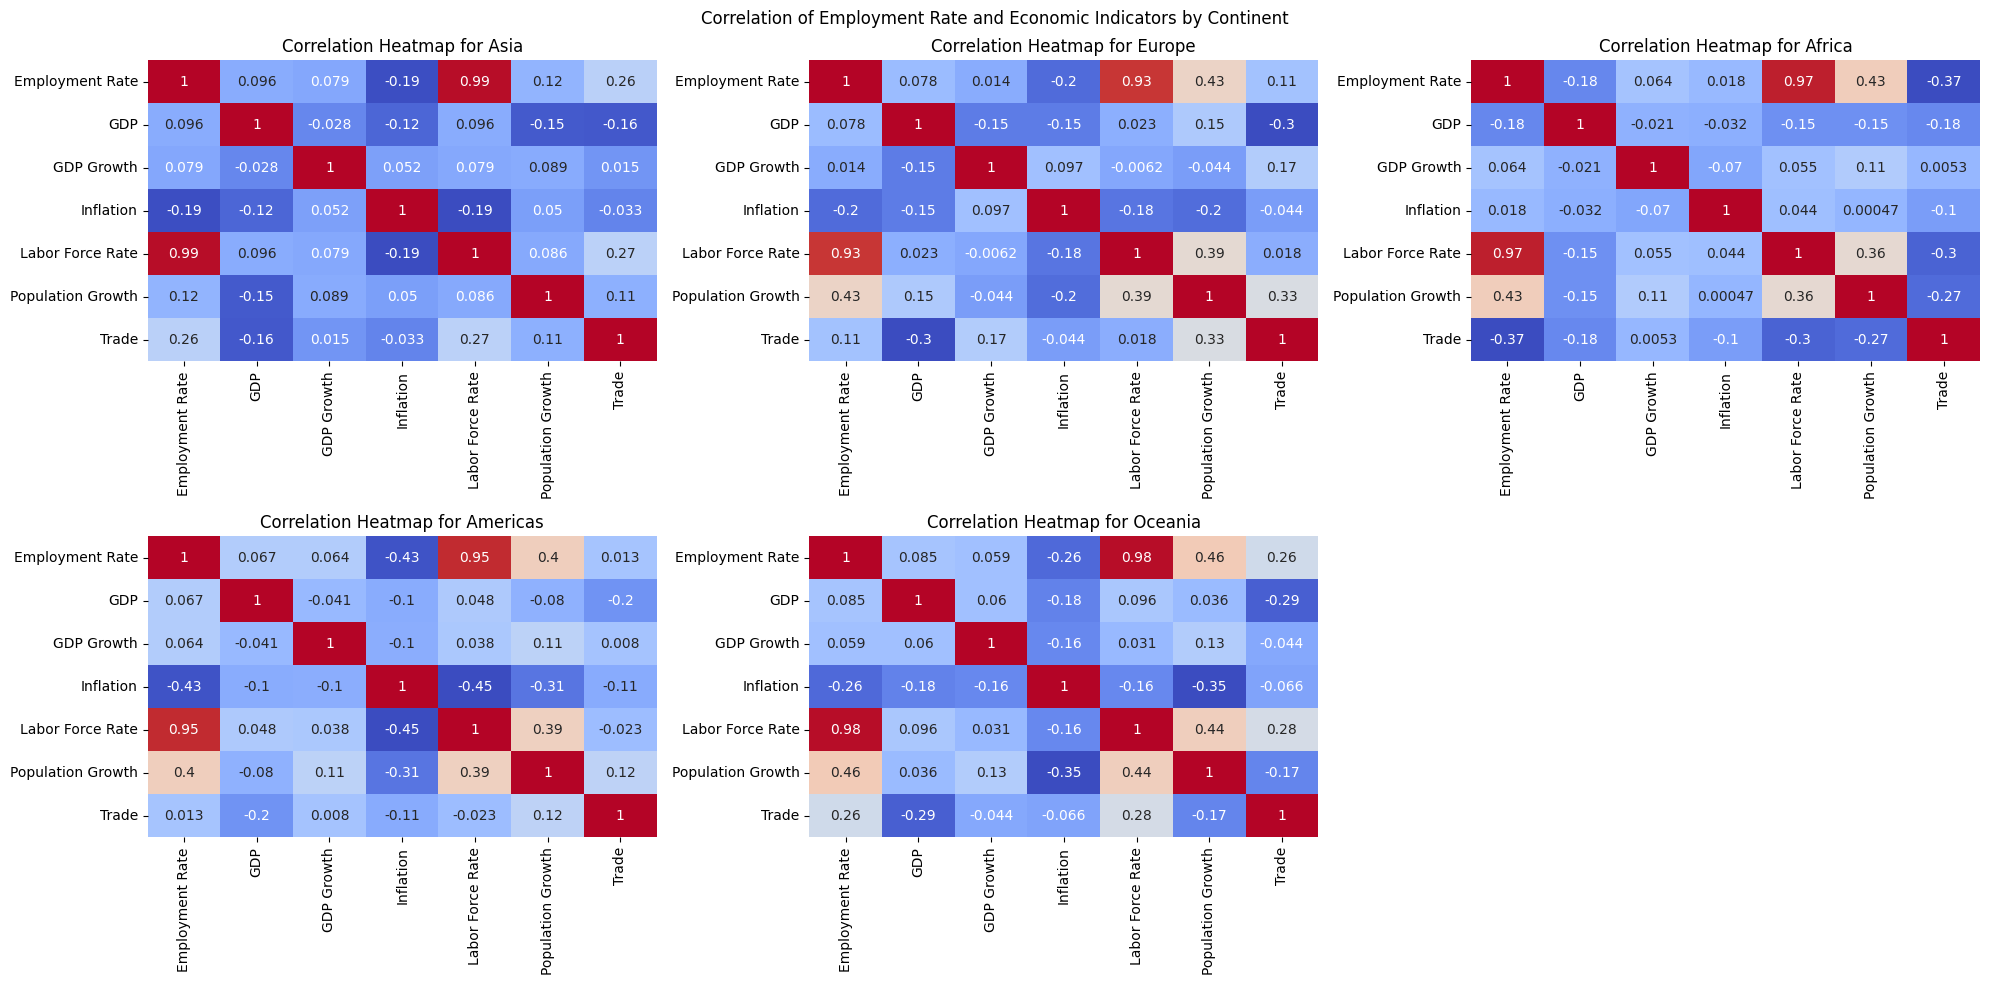

In [45]:
# Set up the heatmap for each continent
plt.figure(figsize=(20, 10))

# Loop over each continent to create individual heatmaps
for i, continent in enumerate(df_renamed['Continent'].unique(), 1):
    plt.subplot(2, 3, i)
    subset = df_renamed[df_renamed['Continent'] == continent]
    corr = subset[['Employment Rate', 'GDP', 'GDP Growth', 'Inflation',
                   'Labor Force Rate', 'Population Growth', 'Trade']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", cbar=False)
    plt.title(f'Correlation Heatmap for {continent}')

plt.suptitle("Correlation of Employment Rate and Economic Indicators by Continent")
plt.tight_layout()
plt.show()


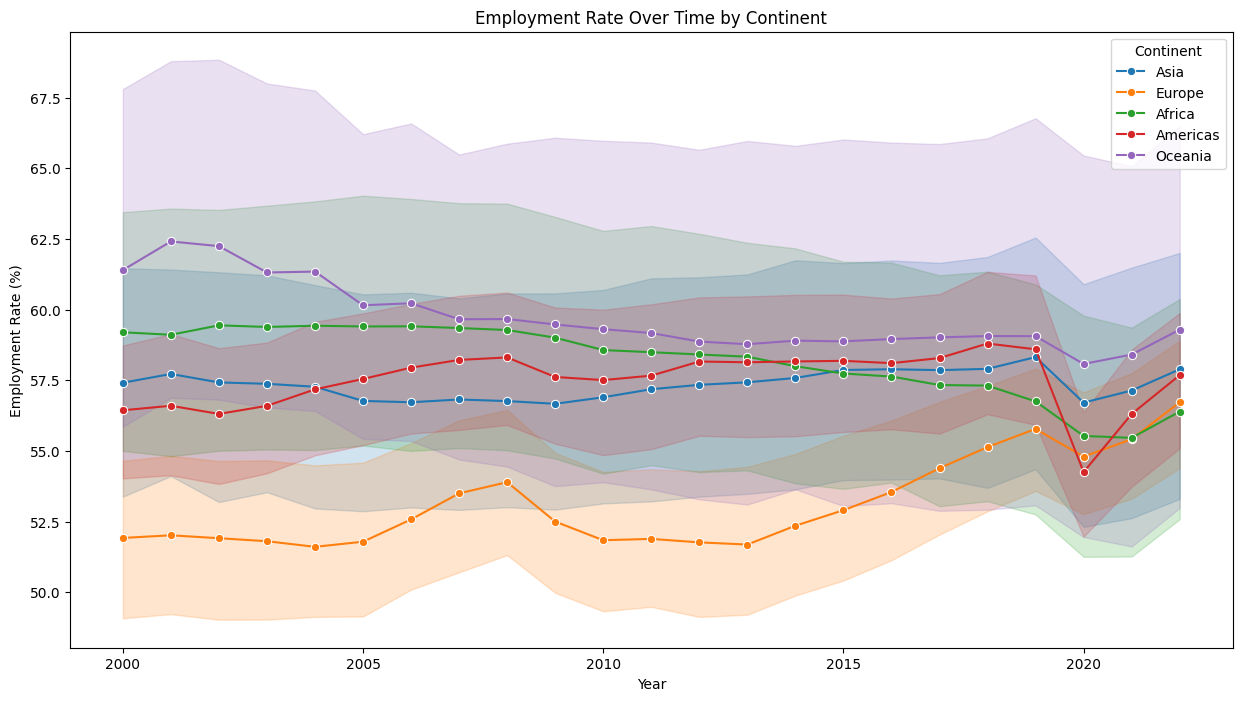

In [46]:
# **Time Series Analysis of Employment Rate (Global and by Continent)**
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_renamed, x='Year', y='Employment Rate', hue='Continent', marker='o')
plt.title('Employment Rate Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.show()


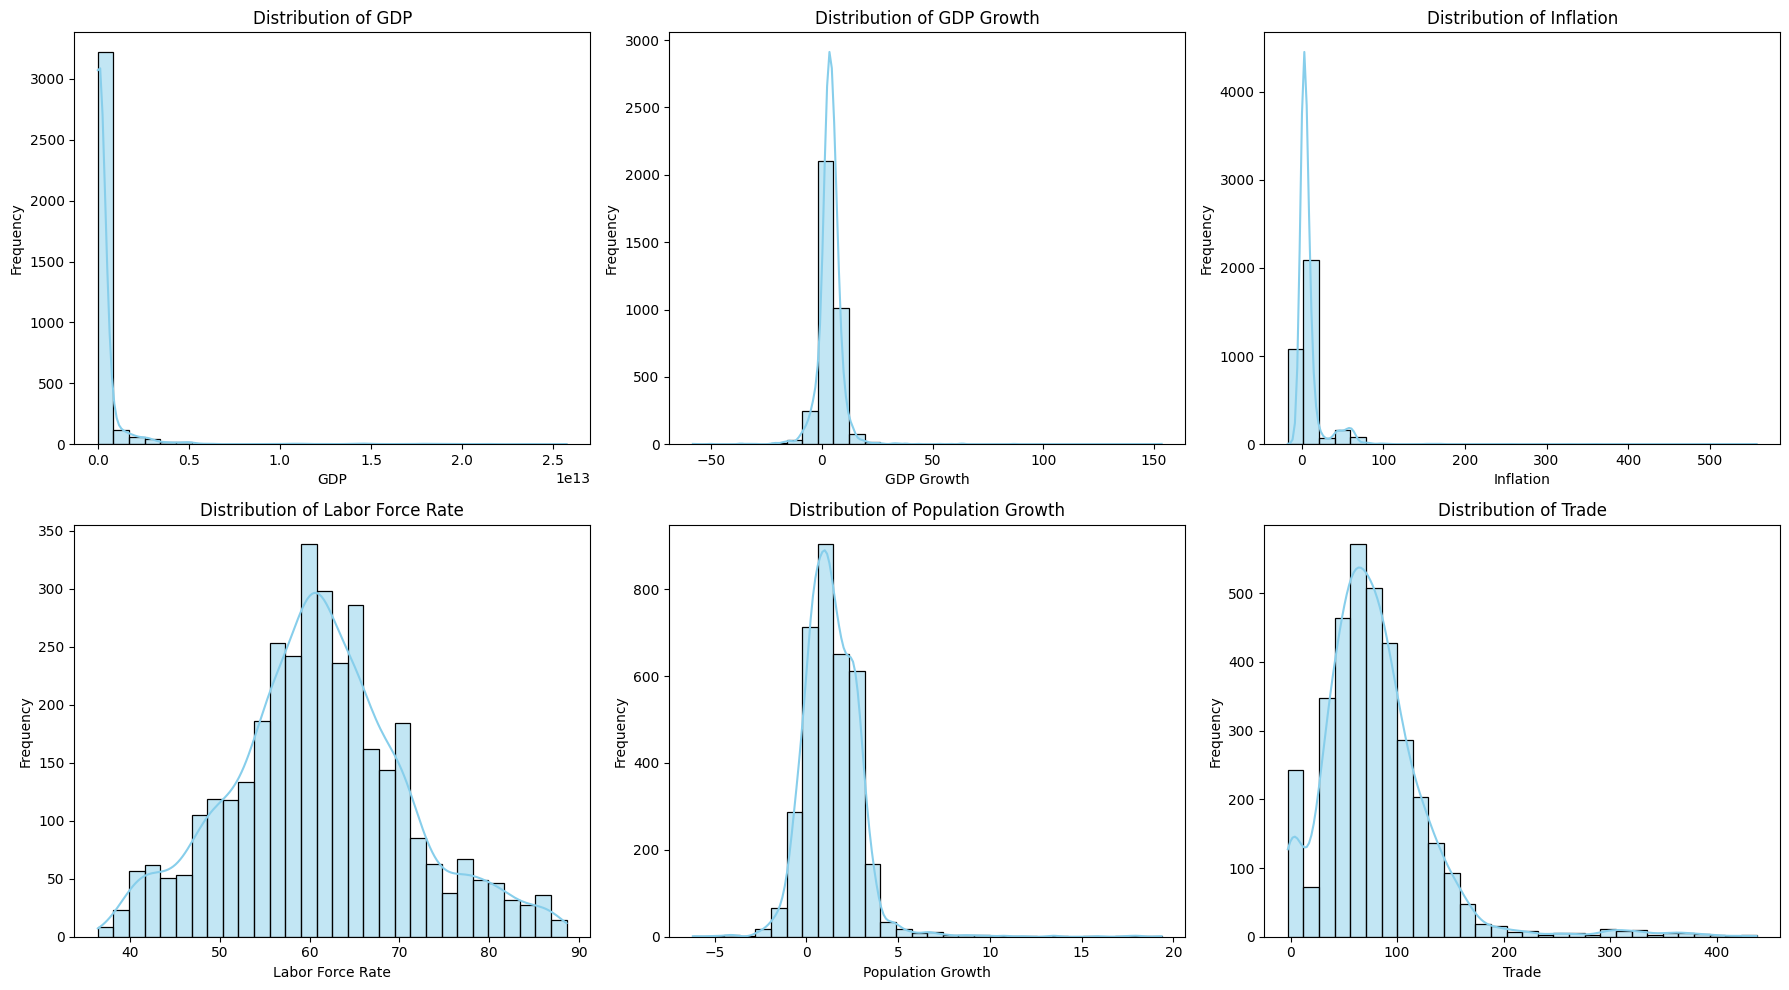

In [47]:
# **Feature Distribution (Histograms) for Input Features**
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# List of input features
input_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Plot histograms
for i, feature in enumerate(input_features):
    sns.histplot(df_renamed[feature], ax=axes[i//3, i%3], kde=True, bins=30, color='skyblue')
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


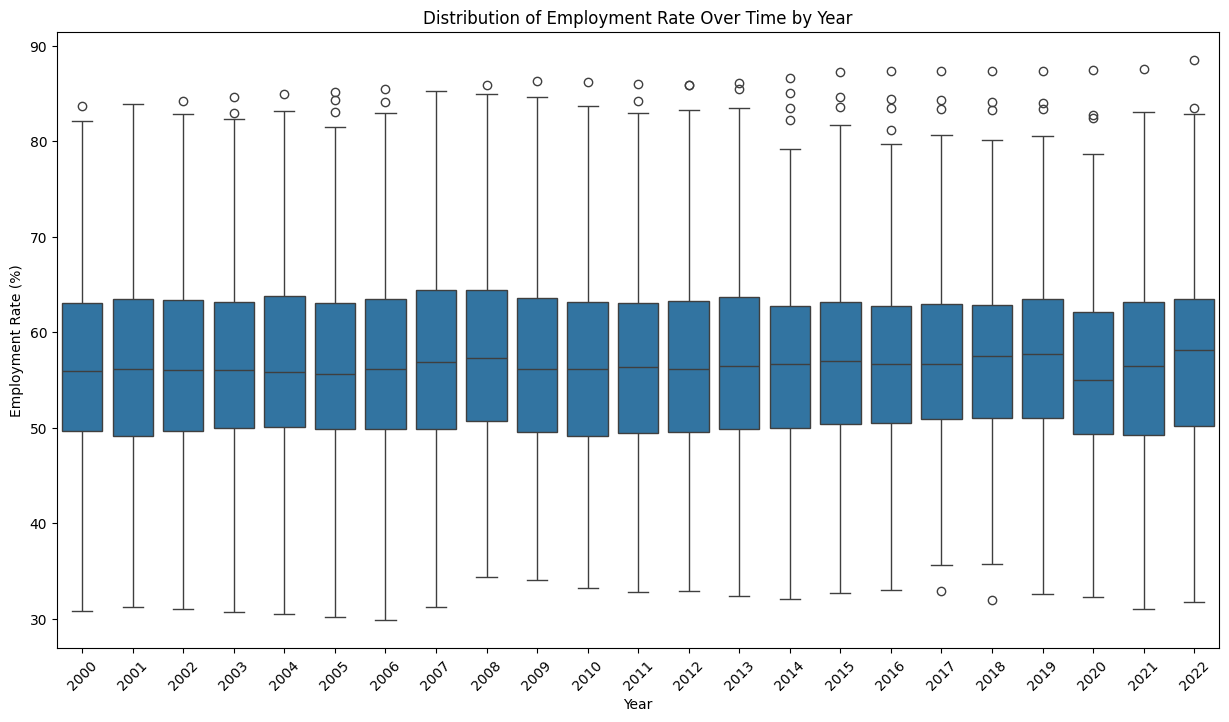

In [48]:
# 5. **Boxplots of Employment Rate Over Time by Year**
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_renamed, x='Year', y='Employment Rate')
plt.title('Distribution of Employment Rate Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [49]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


# Split the data into features and target
X = df.drop('Employment to population ratio, 15+, total (%) (modeled ILO estimate)', axis=1)
y = df['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']

# Define numeric features (exclude 'Country Name' or similar non-numeric columns)
numeric_features = ['GDP (current US$)', 'GDP growth (annual %)',
                    'Inflation, consumer prices (annual %)',
                    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
                    'Population growth (annual %)', 'Trade (% of GDP)', 'Year']

# Define categorical features
categorical_features = ['Continent']  # Replace with your actual categorical column names

# Drop 'Country Name' if it exists in the dataset
if 'Country Name' in X.columns:
    X = X.drop('Country Name', axis=1)

# Double-check the columns after dropping 'Country Name'
print("Columns after dropping 'Country Name':", X.columns)

# Create and apply the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check the shape of the processed data to confirm successful transformation
print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)


Columns after dropping 'Country Name': Index(['Continent', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'Inflation, consumer prices (annual %)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Population growth (annual %)', 'Trade (% of GDP)'],
      dtype='object')
Processed X_train shape: (2812, 12)
Processed X_test shape: (703, 12)


In [75]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train a Feedforward Neural Network
fnn_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
fnn_model.fit(X_train_processed, y_train)

# Predict and evaluate
y_pred_fnn = fnn_model.predict(X_test_processed)
mse_fnn = mean_squared_error(y_test, y_pred_fnn)
print(f"FNN Mean Squared Error: {mse_fnn}")


FNN Mean Squared Error: 4.576196776101943


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Reshape data for LSTM (LSTM expects 3D input: [samples, timesteps, features])
X_train_lstm = X_train_processed.reshape((X_train_processed.shape[0], 1, X_train_processed.shape[1]))
X_test_lstm = X_test_processed.reshape((X_test_processed.shape[0], 1, X_test_processed.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"LSTM Mean Squared Error: {mse_lstm}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
LSTM Mean Squared Error: 6.647350249530692


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# Build GRU model
gru_model = Sequential()
gru_model.add(GRU(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the GRU model
gru_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the GRU model
y_pred_gru = gru_model.predict(X_test_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
print(f"GRU Mean Squared Error: {mse_gru}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
GRU Mean Squared Error: 6.613283925881195


In [53]:
from keras import regularizers
from keras.layers import Dropout

# Create the FNN model with L2 regularization and dropout
def create_fnn_model_with_regularization():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_processed.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
fnn_model_with_reg = create_fnn_model_with_regularization()
fnn_history = fnn_model_with_reg.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_test_processed, y_test), verbose=1)

# Evaluate the model
fnn_mse_with_reg = fnn_model_with_reg.evaluate(X_test_processed, y_test)
print(f"FNN with Regularization Mean Squared Error: {fnn_mse_with_reg}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3259.0554 - val_loss: 2310.6565
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1766.2533 - val_loss: 206.1778
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218.5397 - val_loss: 85.7018
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160.2008 - val_loss: 66.1910
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137.4829 - val_loss: 50.7625
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.2028 - val_loss: 42.7076
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.4768 - val_loss: 34.2854
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135.0780 - val_loss: 27.7604
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.0234 - val_loss: 25.8652
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.1070 - val_loss: 21.6659
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.7845 - val_loss: 21.5604
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [54]:
# Create a comparison table
model_performance = {
    'Model': ['FNN', 'FNN with Regularization', 'LSTM', 'GRU'],
    'Mean Squared Error': [mse_fnn, fnn_mse_with_reg, mse_lstm, mse_gru]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df)


                     Model  Mean Squared Error
0                      FNN            4.576197
1  FNN with Regularization           10.283726
2                     LSTM            6.647350
3                      GRU            6.613284


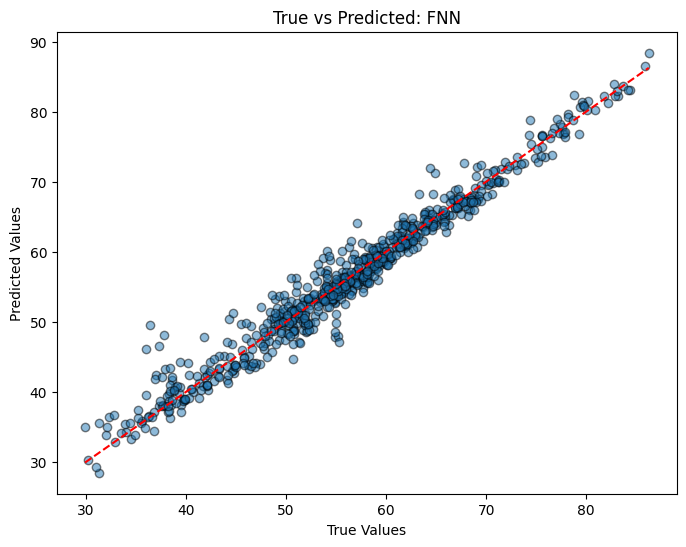

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


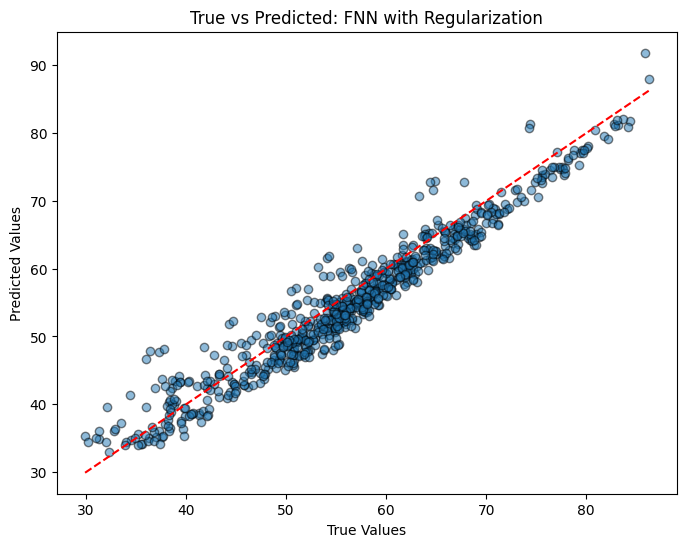

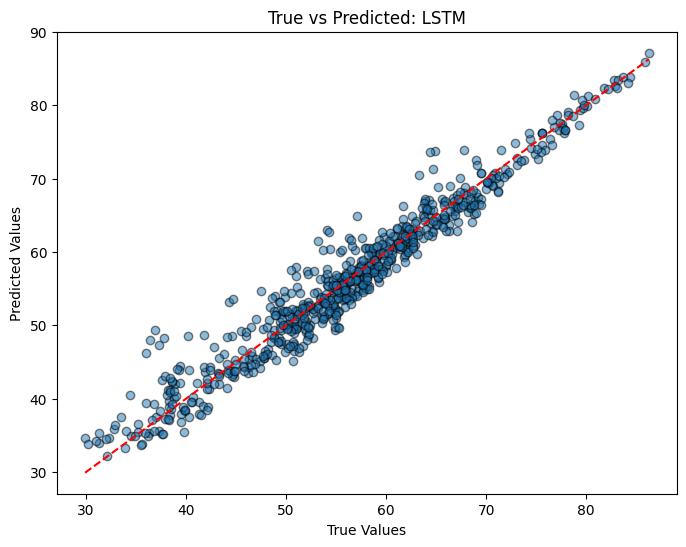

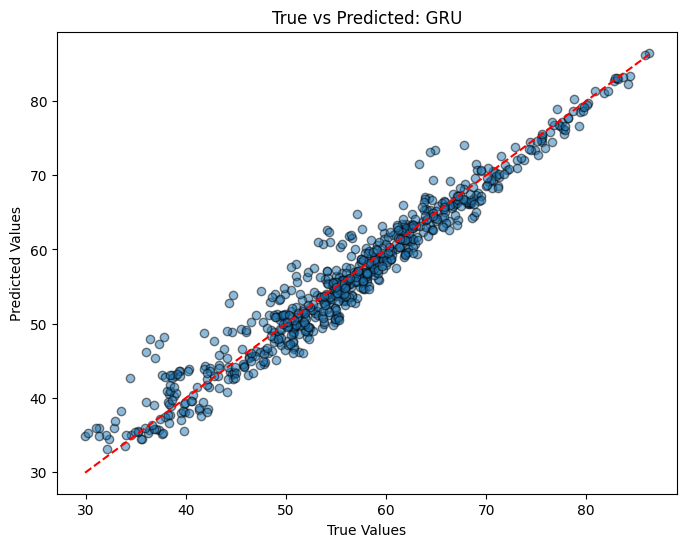

In [55]:
# Import libraries
import matplotlib.pyplot as plt

# Function for plotting
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.show()

# Plot for FNN
plot_predictions(y_test, y_pred_fnn, "True vs Predicted: FNN")

# Plot for FNN with Regularization
y_pred_fnn_with_reg = fnn_model_with_reg.predict(X_test_processed)
plot_predictions(y_test, y_pred_fnn_with_reg, "True vs Predicted: FNN with Regularization")

# Plot for LSTM
plot_predictions(y_test, y_pred_lstm, "True vs Predicted: LSTM")

# Plot for GRU
plot_predictions(y_test, y_pred_gru, "True vs Predicted: GRU")


In [56]:
pip install shap


PermutationExplainer explainer: 704it [00:47, 14.84it/s]                         
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


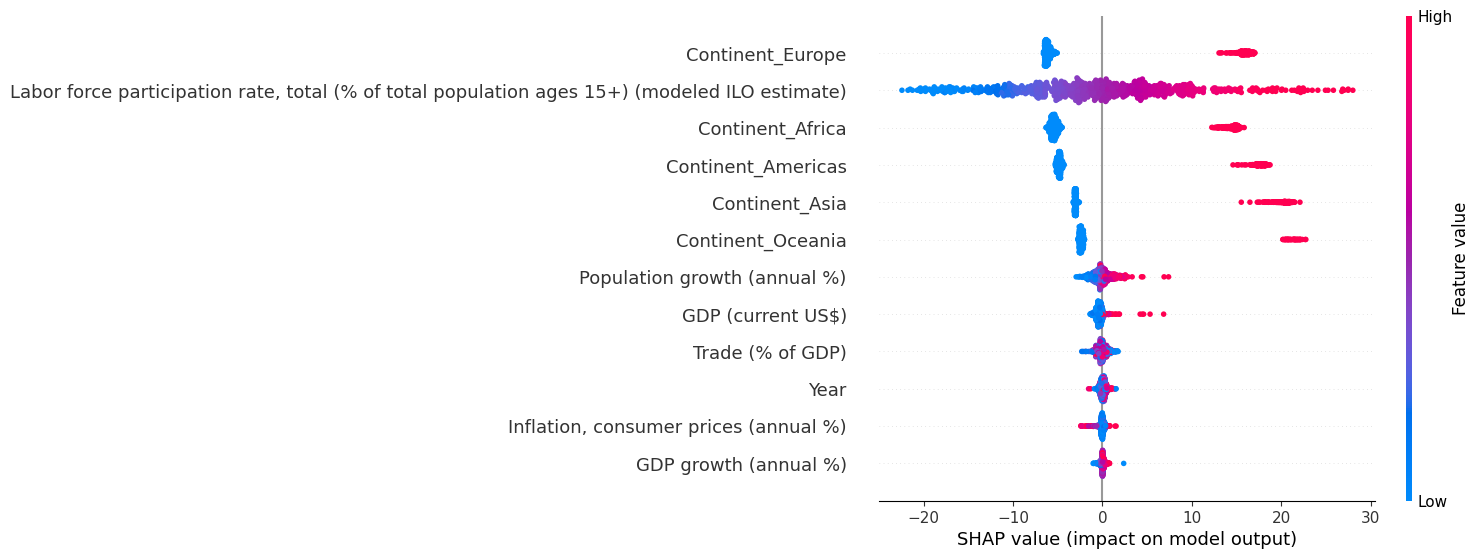

In [57]:
import shap

# SHAP requires the original preprocessed input
explainer = shap.Explainer(fnn_model.predict, X_train_processed)
shap_values = explainer(X_test_processed)

# Summary plot
shap.summary_plot(shap_values, X_test_processed, feature_names=numeric_features + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist())


In [58]:
# Sort the dataset by Year
df = df.sort_values(by='Year')

# Ensure 'Year' is included as a numeric feature
numeric_features = ['GDP (current US$)', 'GDP growth (annual %)',
                    'Inflation, consumer prices (annual %)',
                    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
                    'Population growth (annual %)', 'Trade (% of GDP)', 'Year']
categorical_features = ['Continent']

# Use only numeric features for time-series prediction (you can experiment with categorical data later)
features = numeric_features
target = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'


In [59]:
# Extend the 'Year' column for the next 3 years
future_years = pd.DataFrame({'Year': [df['Year'].max() + i for i in range(1, 4)]})

# Assume constant or slight growth for other features (adjust based on domain knowledge)
future_years['GDP (current US$)'] = df['GDP (current US$)'].mean()  # Example: Use the mean GDP
future_years['GDP growth (annual %)'] = df['GDP growth (annual %)'].mean()
future_years['Inflation, consumer prices (annual %)'] = df['Inflation, consumer prices (annual %)'].mean()
future_years['Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)'] = df['Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)'].mean()
future_years['Population growth (annual %)'] = df['Population growth (annual %)'].mean()
future_years['Trade (% of GDP)'] = df['Trade (% of GDP)'].mean()
future_years['Continent'] = df['Continent'].mode()[0]  # Use the most common continent (can adjust for specific trends)

# Preprocess the future data
future_processed = preprocessor.transform(future_years)


In [60]:
# Predict using the best-performing model (replace 'model' with your chosen one)
future_predictions = fnn_model_with_reg.predict(future_processed)

# Add predictions to the future dataframe
future_years['Predicted Employment Rate'] = future_predictions

# Display results
print(future_years)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
   Year  GDP (current US$)  GDP growth (annual %)  \
0  2023       4.008211e+11               3.691455   
1  2024       4.008211e+11               3.691455   
2  2025       4.008211e+11               3.691455   

   Inflation, consumer prices (annual %)  \
0                                9.57368   
1                                9.57368   
2                                9.57368   

   Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)  \
0                                          61.123312                                               
1                                          61.123312                                               
2                                          61.123312                                               

   Population growth (annual %)  Trade (% of GDP) Continent  \
0                      1.387203          79.35575    Africa   
1                      1.387203          79.

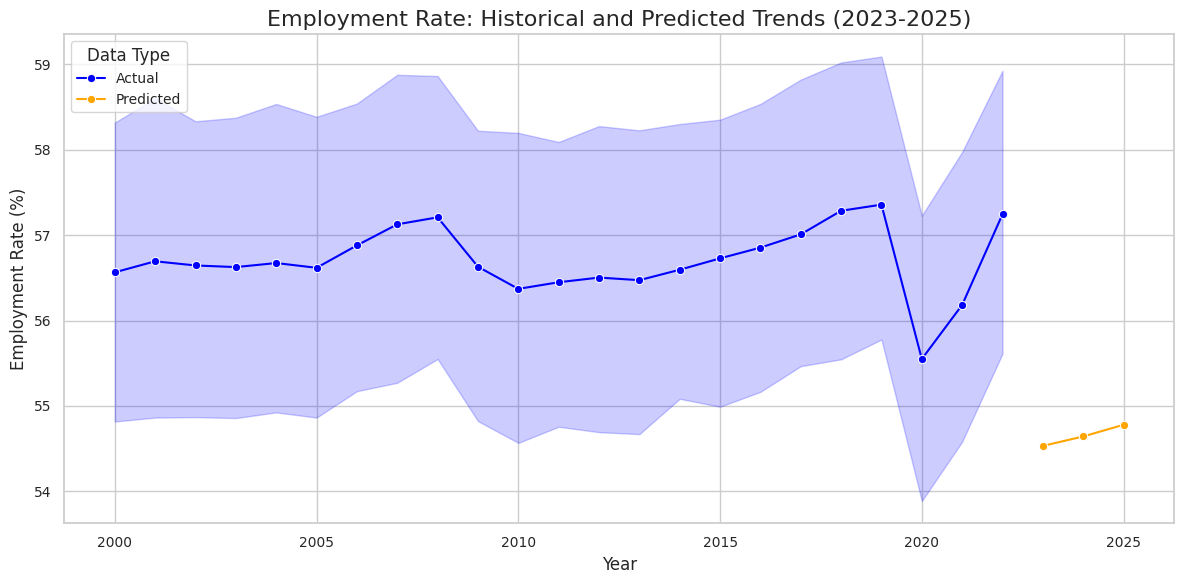

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine actual and predicted data for a cohesive plot
actual_data = df[['Year', target]].rename(columns={target: "Employment Rate"})
future_data = future_years[['Year', 'Predicted Employment Rate']].rename(columns={'Predicted Employment Rate': "Employment Rate"})
future_data['Type'] = 'Predicted'
actual_data['Type'] = 'Actual'

# Concatenate for a single plot
combined_data = pd.concat([actual_data, future_data], ignore_index=True)

# Set a seaborn style for the plot
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='Year', y='Employment Rate', hue='Type', marker='o', palette=['blue', 'orange'])

# Customize the plot
plt.title("Employment Rate: Historical and Predicted Trends (2023-2025)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Employment Rate (%)", fontsize=12)
plt.legend(title="Data Type", loc='upper left', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [62]:
# Add lag features for employment rate to capture past trends
def create_lag_features(df, lag=1):
    df_lagged = df.copy()
    df_lagged['Employment to population ratio, 15+, total (%) (modeled ILO estimate)_lag'] = df_lagged['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].shift(lag)
    df_lagged.dropna(inplace=True)
    return df_lagged

# Apply lagging to the dataframe (you can use multiple lags for better predictions)
df_lagged = create_lag_features(df, lag=1)

# Use lagged employment rate as an additional feature for prediction
X_lagged = df_lagged.drop(columns=['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'])
y_lagged = df_lagged['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']


In [63]:
# One-Hot Encoding for categorical variables like 'Continent'
df_lagged_encoded = pd.get_dummies(df_lagged, drop_first=True)

# Separate features (X) and target (y)
X_lagged_encoded = df_lagged_encoded.drop(columns=['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'])
y_lagged_encoded = df_lagged_encoded['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']




In [64]:
# Initialize the model
fnn_model = MLPRegressor(hidden_layer_sizes=(32,), max_iter=500, random_state=42)

# Fit the model with encoded data
fnn_model.fit(X_lagged_encoded, y_lagged_encoded)

# Predict and evaluate
y_pred_fnn = fnn_model.predict(X_lagged_encoded)
mse_fnn = mean_squared_error(y_lagged_encoded, y_pred_fnn)
print(f"FNN Mean Squared Error: {mse_fnn}")


FNN Mean Squared Error: 455697004054737.3


In [65]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to scale the numeric features
scaler = StandardScaler()
X_lagged_encoded_scaled = scaler.fit_transform(X_lagged_encoded)

# Fit the model with scaled data
fnn_model.fit(X_lagged_encoded_scaled, y_lagged_encoded)

# Predict and evaluate
y_pred_fnn = fnn_model.predict(X_lagged_encoded_scaled)
mse_fnn = mean_squared_error(y_lagged_encoded, y_pred_fnn)
print(f"FNN Mean Squared Error after scaling: {mse_fnn}")


FNN Mean Squared Error after scaling: 0.45580709160458777


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
# Example with adjusted hyperparameters
fnn_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42, learning_rate_init=0.001)
fnn_model.fit(X_lagged_encoded_scaled, y_lagged_encoded)

# Predict and evaluate
y_pred_fnn = fnn_model.predict(X_lagged_encoded_scaled)
mse_fnn = mean_squared_error(y_lagged_encoded, y_pred_fnn)
print(f"FNN Mean Squared Error after tuning: {mse_fnn}")


FNN Mean Squared Error after tuning: 0.6667298054506429


In [67]:
from sklearn.metrics import r2_score

r2_fnn = r2_score(y_lagged_encoded, y_pred_fnn)
print(f"FNN R-Squared: {r2_fnn}")


FNN R-Squared: 0.9945356928761387


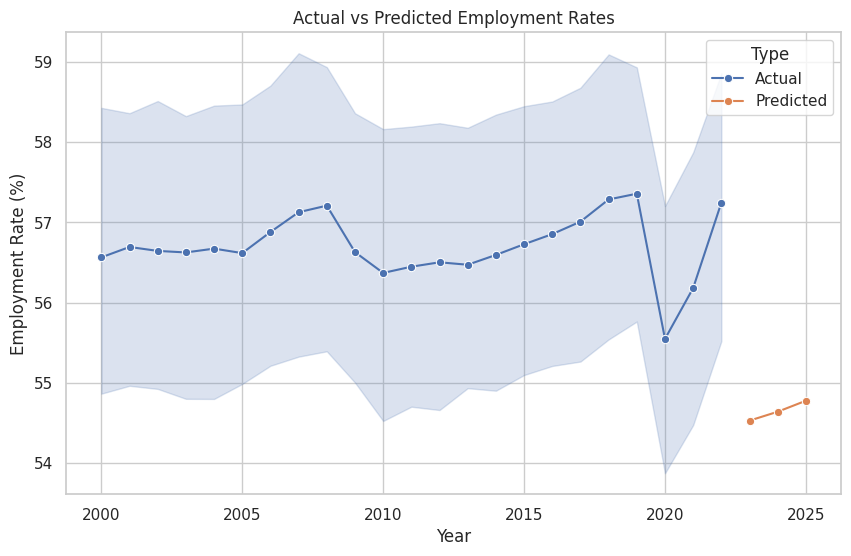

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains actual data and future_years contains the predicted data
# Actual data (from your original dataset)
actual_data = df[['Year', target]].rename(columns={target: "Employment Rate"})
actual_data['Type'] = 'Actual'  # Label as actual data

# Future data (predicted data for future years)
future_data = future_years[['Year', 'Predicted Employment Rate']].rename(columns={'Predicted Employment Rate': "Employment Rate"})
future_data['Type'] = 'Predicted'  # Label as predicted data

# Combine both dataframes for a cohesive plot
combined_data = pd.concat([actual_data, future_data], ignore_index=True)

# Set seaborn style for the plot
sns.set_theme(style="whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='Year', y='Employment Rate', hue='Type', marker='o')

# Customize the plot with title and labels
plt.title('Actual vs Predicted Employment Rates')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')

# Show the plot
plt.show()


Predicted Employment Rates for Asia:
Year: 2023, Employment Rate: 58.94%
Year: 2024, Employment Rate: 58.94%
Year: 2025, Employment Rate: 58.95%

Predicted Employment Rates for Europe:
Year: 2023, Employment Rate: 54.07%
Year: 2024, Employment Rate: 54.08%
Year: 2025, Employment Rate: 54.08%

Predicted Employment Rates for Africa:
Year: 2023, Employment Rate: 55.80%
Year: 2024, Employment Rate: 55.80%
Year: 2025, Employment Rate: 55.80%

Predicted Employment Rates for Americas:
Year: 2023, Employment Rate: 56.53%
Year: 2024, Employment Rate: 56.53%
Year: 2025, Employment Rate: 56.54%

Predicted Employment Rates for Oceania:
Year: 2023, Employment Rate: 54.43%
Year: 2024, Employment Rate: 54.43%
Year: 2025, Employment Rate: 54.42%



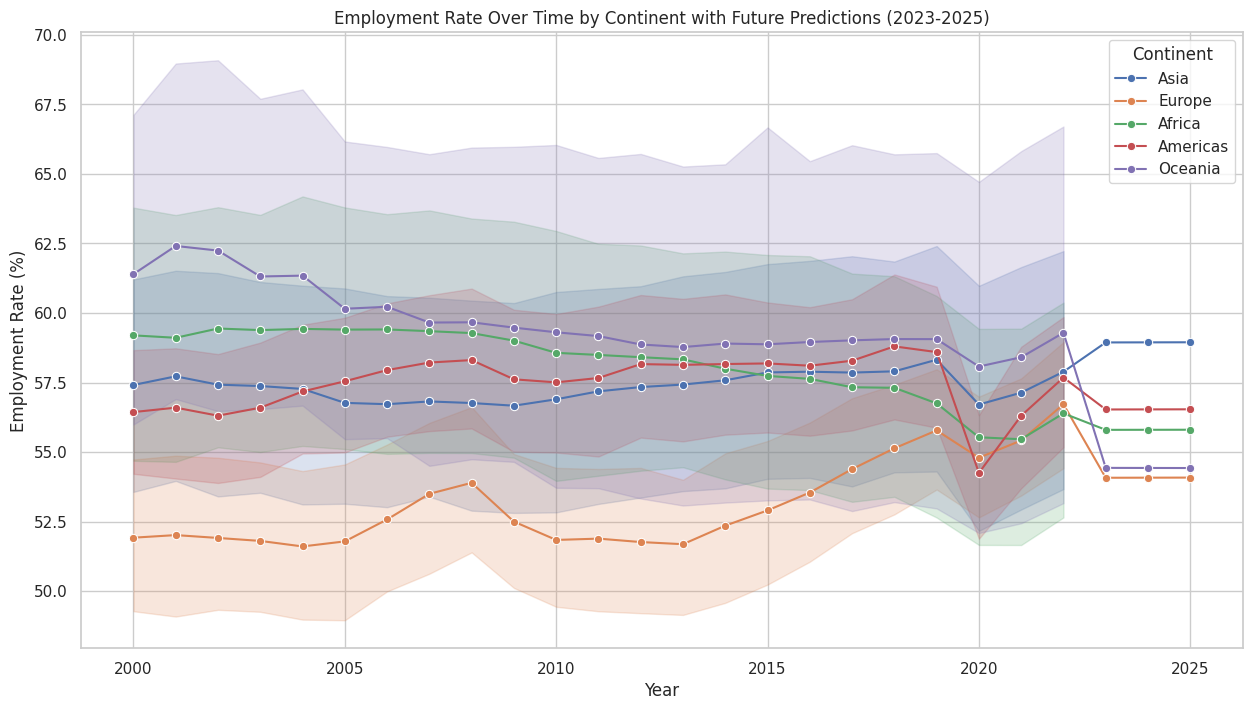

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

# Assuming 'df_renamed' contains 'Year', 'Employment Rate', and 'Continent'

# Step 1: Preprocess data
df_renamed = df_renamed[['Year', 'Employment Rate', 'Continent']]  # Select relevant columns
df_renamed = df_renamed.dropna()  # Remove rows with missing data

# Step 2: Initialize an empty dataframe to store the future data
future_data_all = pd.DataFrame()

# Step 3: Train a separate model for each continent and predict future values
for continent in df_renamed['Continent'].unique():
    # Filter the data for the current continent
    continent_data = df_renamed[df_renamed['Continent'] == continent]

    # Feature and target
    X = continent_data[['Year']].values  # Feature: Year
    y = continent_data['Employment Rate'].values  # Target: Employment Rate

    # Normalize the data for neural network training
    scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaled = scaler.fit_transform(y.reshape(-1, 1))

    # Train FNN model for the current continent
    fnn_model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)
    fnn_model.fit(X, y_scaled.ravel())

    # Step 4: Generate predictions for the next 3 years (2023, 2024, 2025)
    future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
    future_predictions_scaled = fnn_model.predict(future_years)

    # Inverse the scaling to get predictions in the original range
    future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1))

    # Print predicted employment rates for this continent
    print(f"Predicted Employment Rates for {continent}:")
    for year, prediction in zip([2023, 2024, 2025], future_predictions.flatten()):
        print(f"Year: {year}, Employment Rate: {prediction:.2f}%")
    print()  # Newline for better readability

    # Step 5: Create a dataframe for the future data for this continent
    future_data = pd.DataFrame({
        'Year': [2023, 2024, 2025],
        'Employment Rate': future_predictions.flatten(),
        'Continent': [continent] * 3  # Assign the current continent
    })

    # Append the future data for this continent to the combined future data
    future_data_all = pd.concat([future_data_all, future_data], ignore_index=True)

# Step 6: Combine the original and future data
df_extended = pd.concat([df_renamed, future_data_all], ignore_index=True)

# Step 7: Plot the data with future predictions for each continent
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_extended, x='Year', y='Employment Rate', hue='Continent', marker='o')
plt.title('Employment Rate Over Time by Continent with Future Predictions (2023-2025)')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.show()


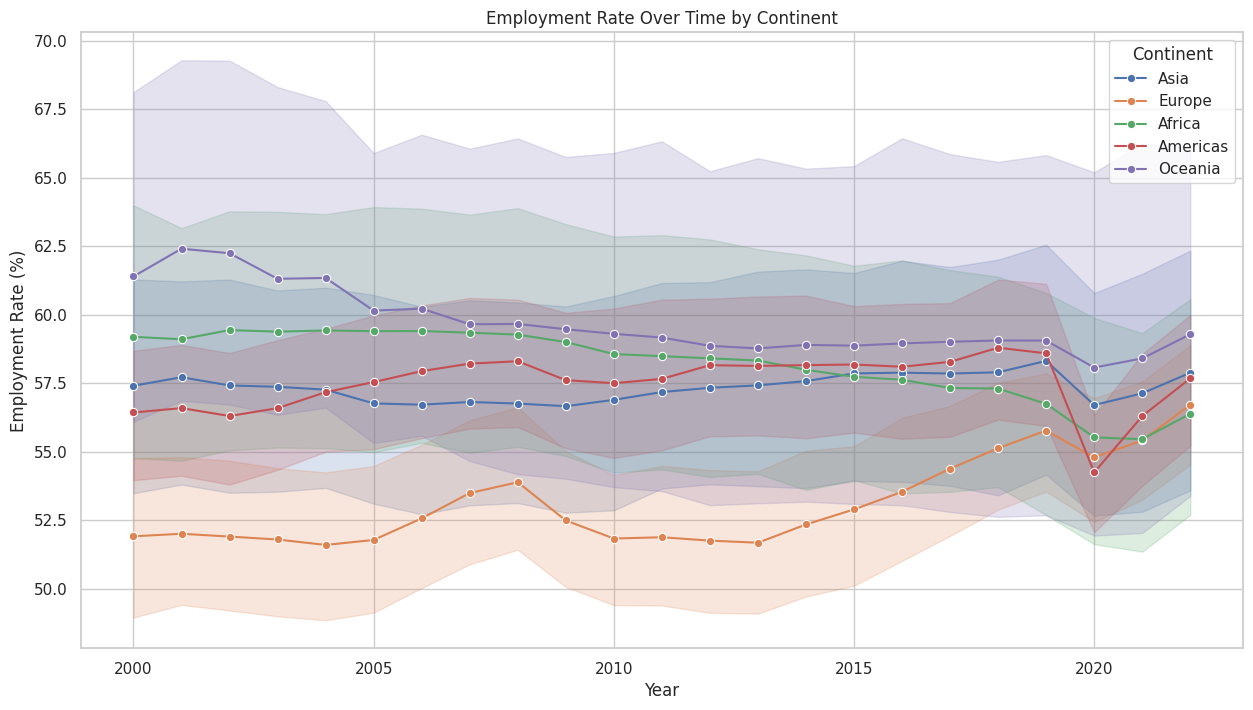

In [70]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_renamed, x='Year', y='Employment Rate', hue='Continent', marker='o')
plt.title('Employment Rate Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.show()


In [71]:
fnn_model = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)


In [72]:
# Fit the model again, just to ensure it's trained
fnn_model.fit(X, y_scaled.ravel())

# Access the coefficients (weights) of the trained model
print(f"Model Coefficients (Weights): {fnn_model.coefs_}")


Model Coefficients (Weights): [array([[-2.50308387e-03,  1.93162520e-01,  9.90820880e-02,
         3.52958653e-02, -5.70286418e-02, -5.70369173e-02,
        -9.23839107e-02,  1.53244205e-01,  4.20224405e-02,
         9.04596599e-02, -1.06615985e-01,  2.01951440e-01,
         1.40736715e-01, -3.85359686e-02, -4.83356910e-02,
        -4.78148005e-02, -1.37079663e-02,  1.62327440e-02,
         9.41656790e-04, -1.66580386e-02,  4.98691471e-02,
        -6.27576871e-02, -1.64430730e-02, -3.33970774e-03,
        -1.07201357e-02,  1.21833009e-01, -4.25333120e-02,
         2.49727851e-03,  3.22406120e-02, -9.67668501e-02,
         4.75598865e-02, -5.21013784e-02, -8.97738065e-02,
         1.94016869e-01,  2.01353801e-01,  1.32163635e-01,
        -1.36271777e-02, -7.77228219e-02,  7.95879976e-02,
         3.65346564e-05, -6.89289240e-02,  1.91861385e-03,
        -1.01342735e-01,  1.77085218e-01, -2.49235937e-02,
         6.36984634e-02, -1.21223677e-02,  8.19264082e-03,
         2.14447601e-02, 

In [73]:
# Increase the model complexity and training iterations for each continent
fnn_model = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=3000, random_state=42)

for continent in df_renamed['Continent'].unique():
    continent_data = df_renamed[df_renamed['Continent'] == continent]
    X = continent_data[['Year']].values  # Feature: Year
    y = continent_data['Employment Rate'].values  # Target: Employment Rate

    # Normalize the data for neural network training
    scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaled = scaler.fit_transform(y.reshape(-1, 1))

    # Train FNN model for the current continent
    fnn_model.fit(X, y_scaled.ravel())

    # Generate predictions for the next 3 years (2023, 2024, 2025)
    future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
    future_predictions_scaled = fnn_model.predict(future_years)

    # Inverse the scaling to get predictions in the original range
    future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1))

    # Print predicted employment rates for this continent
    print(f"Predicted Employment Rates for {continent}:")
    for year, prediction in zip([2023, 2024, 2025], future_predictions.flatten()):
        print(f"Year: {year}, Employment Rate: {prediction:.2f}%")
    print()  # Newline for better readability


Predicted Employment Rates for Asia:
Year: 2023, Employment Rate: 34.50%
Year: 2024, Employment Rate: 34.50%
Year: 2025, Employment Rate: 34.50%

Predicted Employment Rates for Europe:
Year: 2023, Employment Rate: 47.57%
Year: 2024, Employment Rate: 47.58%
Year: 2025, Employment Rate: 47.59%

Predicted Employment Rates for Africa:
Year: 2023, Employment Rate: 63.08%
Year: 2024, Employment Rate: 63.09%
Year: 2025, Employment Rate: 63.11%

Predicted Employment Rates for Americas:
Year: 2023, Employment Rate: 59.10%
Year: 2024, Employment Rate: 59.11%
Year: 2025, Employment Rate: 59.12%

Predicted Employment Rates for Oceania:
Year: 2023, Employment Rate: 62.87%
Year: 2024, Employment Rate: 62.88%
Year: 2025, Employment Rate: 62.89%



In [74]:
# Example: Creating lagged data for time-series forecasting
def create_lagged_data(df, n_lags=1):
    df_lagged = df.copy()
    for i in range(1, n_lags + 1):
        df_lagged[f'Employment Rate Lag_{i}'] = df_lagged['Employment Rate'].shift(i)
    df_lagged = df_lagged.dropna()
    return df_lagged
df_lagged = create_lagged_data(df, n_lags=3)


KeyError: 'Employment Rate'